<a href="https://colab.research.google.com/github/AI-KPI/DLBookNotes/blob/main/2.6 Special Kinds of Matrices and Vectors/2_6_Special_Kinds_of_Matrices_and_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
    Цей матеріал є частиною серії що продовжує другий розділ лінійної алгебри з [Deep Learning Book](http://www.deeplearningbook.org/) за авторством Goodfellow, I., Bengio, Y., та Courville, A. (2016). Він спрямований на надання  підказок/малюнків/коду на мові python для математичних теорій і структурований так як я розумію ці концепції. Ви можете ознайомитися з навчальним планом у [вступному пості](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/).
</span>

# Вступ

Ми вже бачили в [2.3](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/) певні типи матриць. Ми ознайомимося з іншими цікавими видами векторів та матриць у цьому розділі. Він не дуже великий але важливо його зрозуміти.

# 2.6 Особливі види матриць і векторів

<img src="images/diagonal-and-symmetric-matrices.png" width="400" alt="Diagonal and symmetric matrices" title="Diagonal and symmetric matrices">
<em>Приклади діагональних та симетричних матриць</em>


# Діагональні матриці

<img src="images/diagonal-matrix.png" width="150" alt="Example of a diagonal matrix" title="Diagonal matrix">
<em>Приклад діагональної матриці</em>

Матриця $\bs{A}_{i,j}$ є діагональною якщо всі її значення дорівнюють нулю окрім тих що знаходяться на діагоналі (коли $i=j$).

### Приклад 1.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

В даному випадку матриця також квадратна але можуть існувати не квадратні діагональні матриці.

### Приклад 2.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
$$

Або

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0
\end{bmatrix}
$$

Діагональну матрицю можна позначити як $diag(\bs{v})$ де $\bs{v}$ є вектором що містить значення діагоналі.

### Приклад 3.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

У цій матриці, $\bs{v}$ є наступним вектором:

$$
\bs{v}=
\begin{bmatrix}
    2\\\\
    4\\\\
    3\\\\
    1
\end{bmatrix}
$$

Фунція Numpy `diag()` може використовуватися для створення квадратних діагональних матриць:

In [4]:
v = np.array([2, 4, 3, 1])
np.diag(v)

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

Множення діагональної матриці на вектор є добутком відповідних елеметнів матриці на елементи вектрора $v$:

### Приклад 4.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

та

$$
\bs{x}=
\begin{bmatrix}
    3\\\\
    2\\\\
    2\\\\
    7
\end{bmatrix}
$$

$$
\begin{align*}
&\bs{Dx}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix} \times
\begin{bmatrix}
    3\\\\
    2\\\\
    2\\\\
    7
\end{bmatrix}\\\\
&=\begin{bmatrix}
    2\times3 + 0\times2 + 0\times2 + 0\times7\\\\
    0\times3 + 4\times2 + 0\times2 + 0\times7\\\\
    0\times3 + 0\times2 + 3\times2 + 0\times7\\\\
    0\times3 + 0\times2 + 0\times2 + 1\times7
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    2\times3\\\\
    4\times2\\\\
    3\times2\\\\
    1\times7
\end{bmatrix}
\end{align*}
$$

Не квадрані матриці мають такі самі властивості:

### Приклад 5.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
$$

та

$$
\bs{x}=
\begin{bmatrix}
    3\\\\
    2\\\\
    2
\end{bmatrix}
$$

$$
\bs{Dx}=
\begin{bmatrix}
    2 & 0 & 0\\\\
    0 & 4 & 0\\\\
    0 & 0 & 3\\\\
    0 & 0 & 0
\end{bmatrix}
\times
\begin{bmatrix}
    3\\\\
    2\\\\
    2
\end{bmatrix}
=
\begin{bmatrix}
    2\times3\\\\
    4\times2\\\\
    3\times2\\\\
    0
\end{bmatrix}
$$

Обернена матриця до квадратної діагональної матриці існує, якщо всі значення діагоналі не дорівнюють нулю. Якщо це так, то оберенену знайти легко. Крім того, обернена не існує якщо матриця не квадратна.

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

$$
\bs{D}^{-1}=
\begin{bmatrix}
    \frac{1}{2} & 0 & 0 & 0\\\\
    0 & \frac{1}{4} & 0 & 0\\\\
    0 & 0 & \frac{1}{3} & 0\\\\
    0 & 0 & 0 & \frac{1}{1}
\end{bmatrix}
$$

$$
\bs{D}=
\begin{bmatrix}
    2 & 0 & 0 & 0\\\\
    0 & 4 & 0 & 0\\\\
    0 & 0 & 3 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    \frac{1}{2} & 0 & 0 & 0\\\\
    0 & \frac{1}{4} & 0 & 0\\\\
    0 & 0 & \frac{1}{3} & 0\\\\
    0 & 0 & 0 & \frac{1}{1}
\end{bmatrix}=
\begin{bmatrix}
    1 & 0 & 0 & 0\\\\
    0 & 1 & 0 & 0\\\\
    0 & 0 & 1 & 0\\\\
    0 & 0 & 0 & 1
\end{bmatrix}
$$

Виконаємо перевірку за допомогою Numpy того факту, що множення матриці на її оберенену дасть добуток у вигляді одиничної матриці:

In [5]:
A = np.array([[2, 0, 0, 0], [0, 4, 0, 0], [0, 0, 3, 0], [0, 0, 0, 1]])
A

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

In [6]:
A_inv = np.array([[1/2., 0, 0, 0], [0, 1/4., 0, 0], [0, 0, 1/3., 0], [0, 0, 0, 1/1.]])
A_inv

array([[0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.25      , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [7]:
A.dot(A_inv)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Чудово! Ми отримали одиничну матрицю

# Симетричні матриці

<img src="images/symmetric-matrix.png" width="150" alt="Illustration of a symmetric matrix" title="Symmetric matrix">
<em>Ілюстрація симетричної матриці</em>

Матриця $A$ є симетричною якщо вона дорівнює транспонованій:
    
$$
\bs{A} = \bs{A}^\text{T}
$$

Це стосується лише квадратних матриць.

### Приклад 6.

$$
\bs{A}=
\begin{bmatrix}
    2 & 4 & -1\\\\
    4 & -8 & 0\\\\
    -1 & 0 & 3
\end{bmatrix}
$$

In [8]:
A = np.array([[2, 4, -1], [4, -8, 0], [-1, 0, 3]])
A

array([[ 2,  4, -1],
       [ 4, -8,  0],
       [-1,  0,  3]])

In [9]:
A.T

array([[ 2,  4, -1],
       [ 4, -8,  0],
       [-1,  0,  3]])

# Одиничні вектори

Одницичний вектор - це вектор довжина якого довівнює 1. Він може позначатися буквою з капелюшком: $\hat{u}$

# Ортогональні вектори

Два ортогональних вектора розділяються кутом в 90°. Скалярний добуток двох ортогональних векторів дорівнює 0.

### Приклад 7.

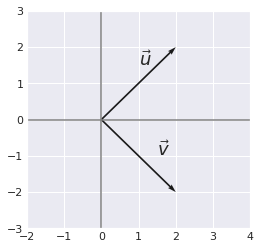

In [10]:
x = [0,0,2,2]
y = [0,0,2,-2]

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-3, 3)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(1, 1.5, r'$\vec{u}$', size=18)
plt.text(1.5, -1, r'$\vec{v}$', size=18)

plt.show()
plt.close()

$$
\bs{x}= 
\begin{bmatrix}
    2\\\\
    2
\end{bmatrix}
$$

та

$$
\bs{y}=
\begin{bmatrix}
    2\\\\
    -2
\end{bmatrix}
$$

$$
\bs{x^\text{T}y}=
\begin{bmatrix}
    2 & 2
\end{bmatrix}
\begin{bmatrix}
    2\\\\
    -2
\end{bmatrix}=
\begin{bmatrix}
    2\times2 + 2\times-2
\end{bmatrix}=0
$$

Крім того, коли довжина ортогональних векторів є одиничною, їх називають **ортонормальними**.

<span class='pquote'>
    Неможливо мати більше ніж $n$ векторів взаємно ортогональних у $\mathbb{R}^n$.
</span>

Неможливо мати більше ніж $n$ векторів взаємно ортогональних у $\mathbb{R}^n$. Для прикладу, спробуйте намалювати 3 вектори у двовимірному просторі ($\mathbb{R}^2$) які є взаємно ортогональними...


# Ортогональні матриці

Ортогональні матриці важливі тим ,що вони мають цікаві властивості. Матриця є ортогональною якщо стовбці взаємно ортогональні і мають одиничну довжину (ортонормальні) і рядки є взаємно ортогональними та мають одиничну довжину. 


<img src="images/orthogonal-matrix.png" width="300" alt="Under the hood of an orthogonal matrix" title="Under the hood of an orthogonal matrix">
<em>Під капотом ортогональної матриці</em>

$$
\bs{A}= 
\begin{bmatrix}
    A_{1,1} & A_{1,2}\\\\
    A_{2,1} & A_{2,2}
\end{bmatrix}
$$

Це означає що 

$$
\begin{bmatrix}
    A_{1,1}\\\\
    A_{2,1}
\end{bmatrix}
$$

та 

$$
\begin{bmatrix}
    A_{1,2}\\\\
    A_{2,2}
\end{bmatrix}
$$

є ортогональними векторами, а також, що рядки

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2}
\end{bmatrix}
$$

та

$$
\begin{bmatrix}
    A_{2,1} & A_{2,2}
\end{bmatrix}
$$

є ортогональними векторами (пор. вище для визначення ортогональних векторів).

## Властивість 1: $\bs{A^\text{T}A}=\bs{I}$


Ортогональні матриці мають цю властивість:

$$
\bs{A^\text{T}A}=\bs{AA^\text{T}}=\bs{I}
$$

Ми можемо бачити, що це твердження відповідає дійсності з наступними міркуваннями:

Давайте візьмемо таку матрицю:

$$
\bs{A}=\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}
$$

і таку

$$
\bs{A}^\text{T}=\begin{bmatrix}
    a & c\\\\
    b & d
\end{bmatrix}
$$

Виконаємо множення:

$$
\begin{align*}
&\bs{A^\text{T}A}=\begin{bmatrix}
    a & c\\\\
    b & d
\end{bmatrix}
\begin{bmatrix}
    a & b\\\\
    c & d
\end{bmatrix}
=
\begin{bmatrix}
    aa + cc & ab + cd\\\\
    ab + cd & bb + dd
\end{bmatrix}\\\\
&=
\begin{bmatrix}
    a^2 + c^2 & ab + cd\\\\
    ab + cd & b^2 + d^2
\end{bmatrix}
\end{align*}
$$

Ми бачили в [2.5](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.5-Norms/) що довжина вектора $\begin{bmatrix}
    a & c
\end{bmatrix}$ дорівнює $a^2+c^2$ ($L^2$ або квадрат $L^2$). Таким чином, ми бачимо що рядки $\bs{A}$ має одиничну довжину оскільки $\bs{A}$ є ортогональним. Це означає що $a^2+c^2=1$ та $b^2+d^2=1$. Тепер ми маємо:

$$
\bs{A^\text{T}A}=
\begin{bmatrix}
    1 & ab + cd\\\\
    ab + cd & 1
\end{bmatrix}
$$

Також, $ab+cd$ відповідає добутку $\begin{bmatrix}
    a & c
\end{bmatrix} and \begin{bmatrix}
    b & d
\end{bmatrix}$:

$$
\begin{bmatrix}
    a & c
\end{bmatrix}
\begin{bmatrix}
    b\\\\
    d
\end{bmatrix}
=
ab+cd
$$

Також ми знаємо що стовбці є ортогональними що означає:

$$
\begin{bmatrix}
    a & c
\end{bmatrix}
\begin{bmatrix}
    b\\\\
    d
\end{bmatrix}=0
$$

Маємо одничну матрицю:

$$
\bs{A^\text{T}A}=\begin{bmatrix}
    1 & 0\\\\
    0 & 1
\end{bmatrix}
$$

## Властивість 2: $\bs{A}^\text{T}=\bs{A}^{-1}$

Ми можемо продемонструвати це, якщо $\bs{A^\text{T}A}=\bs{I}$ тоді $
\bs{A}^\text{T}=\bs{A}^{-1}$.

Якщо помножити кожнк сторону рівняння $\bs{A^\text{T}A}=\bs{I}$ на $\bs{A}^{-1}$ ми матимемо:

$$
(\bs{A^\text{T}A})\bs{A}^{-1}=\bs{I}\bs{A}^{-1}
$$

Згадайтез [2.3](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/) що матриця або вектор не змінюється якщо їх множать на одиничну матрицю. Тоді маємо:

$$
(\bs{A^\text{T}A})\bs{A}^{-1}=\bs{A}^{-1}
$$

Також ми бачили в [2.2](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.2-Multiplying-Matrices-and-Vectors/) що сноження матриць є асоціативним, тому ми можемо прибрати дужки:

$$
\bs{A^\text{T}A}\bs{A}^{-1}=\bs{A}^{-1}
$$

Нам відомо що $\bs{A}\bs{A}^{-1}=\bs{I}$ (див. [2.3](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.3-Identity-and-Inverse-Matrices/)) тому ми можемо замінити:

$$
\bs{A^\text{T}}\bs{I}=\bs{A}^{-1}
$$

Це показує наступне

$$\bs{A}^\text{T}=\bs{A}^{-1}$$

Ви можете звернутися до [цього питання](https://math.stackexchange.com/questions/1936020/why-is-the-inverse-of-an-orthogonal-matrix-equal-to-its-transpose).

### Приклад 8.

Синус і косинус зручні для створення ортогональних матриць. Візьмемо таку матрицю:

$$
\bs{A}= 
\begin{bmatrix}
    cos(50) & -sin(50)\\\\
    sin(50) & cos(50)
\end{bmatrix}
$$

In [11]:
A = np.array([[np.cos(50), -np.sin(50)], [np.sin(50), np.cos(50)]])
A

array([[ 0.96496603,  0.26237485],
       [-0.26237485,  0.96496603]])

In [12]:
col0 = A[:, [0]]
col1 = A[:, [1]]
row0 = A[0].reshape(A.shape[1], 1)
row1 = A[1].reshape(A.shape[1], 1)

Давайте перевіримо рядки та стовбці на ортогональність:

In [13]:
col0.T.dot(col1)

array([[0.]])

In [14]:
row0.T.dot(row1)

array([[0.]])

Перевіримо це

$$
\bs{A^\text{T}A}=\bs{AA^\text{T}}=\bs{I}
$$

і це

$$
\bs{A}^\text{T}=\bs{A}^{-1}
$$

In [15]:
A.T.dot(A)

array([[1., 0.],
       [0., 1.]])

In [16]:
A.T

array([[ 0.96496603, -0.26237485],
       [ 0.26237485,  0.96496603]])

In [17]:
numpy.linalg.inv(A)

array([[ 0.96496603, -0.26237485],
       [ 0.26237485,  0.96496603]])

Все правильно!

# Підсумки

У цьому розділі ми побачили різні цікаві типи матриць зі специфічними властивостями. Як правило, корисно згадати їх, коли ми маємо справу з такими матрицями.

У наступному розділі ми побачимо центральну ідею лінійної алгебри: власне розкладання. Продовжуйте читати!

<span class='notes'>
    Не соромтеся писати мені електронний лист чи коментар. Програму цієї серії можна знайти [у вступній статті](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/). Всі блокноти можна знайти на [Github](https://github.com/hadrienj/deepLearningBook-Notes).
</span>

# Список літератури

## Обернення і транспонування ортогональних матриць

- https://math.stackexchange.com/questions/1936020/why-is-the-inverse-of-an-orthogonal-matrix-equal-to-its-transpose

- https://dyinglovegrape.wordpress.com/2010/11/30/the-inverse-of-an-orthogonal-matrix-is-its-transpose/
- https://github.com/hadrienj/deepLearningBook-Notes/tree/master/2.6%20Special%20Kinds%20of%20Matrices%20and%20Vectors

Переклад: Бєдний Ярослав, студент ІО-02мп, 2020 рік